In [67]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
import glob
import skimage
import scipy
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
from skimage import morphology

# Load resources

In [68]:
cards = np.array([np.array(imageio.imread(filename)) for filename in sorted(glob.glob('./cards/*.jpg'))])

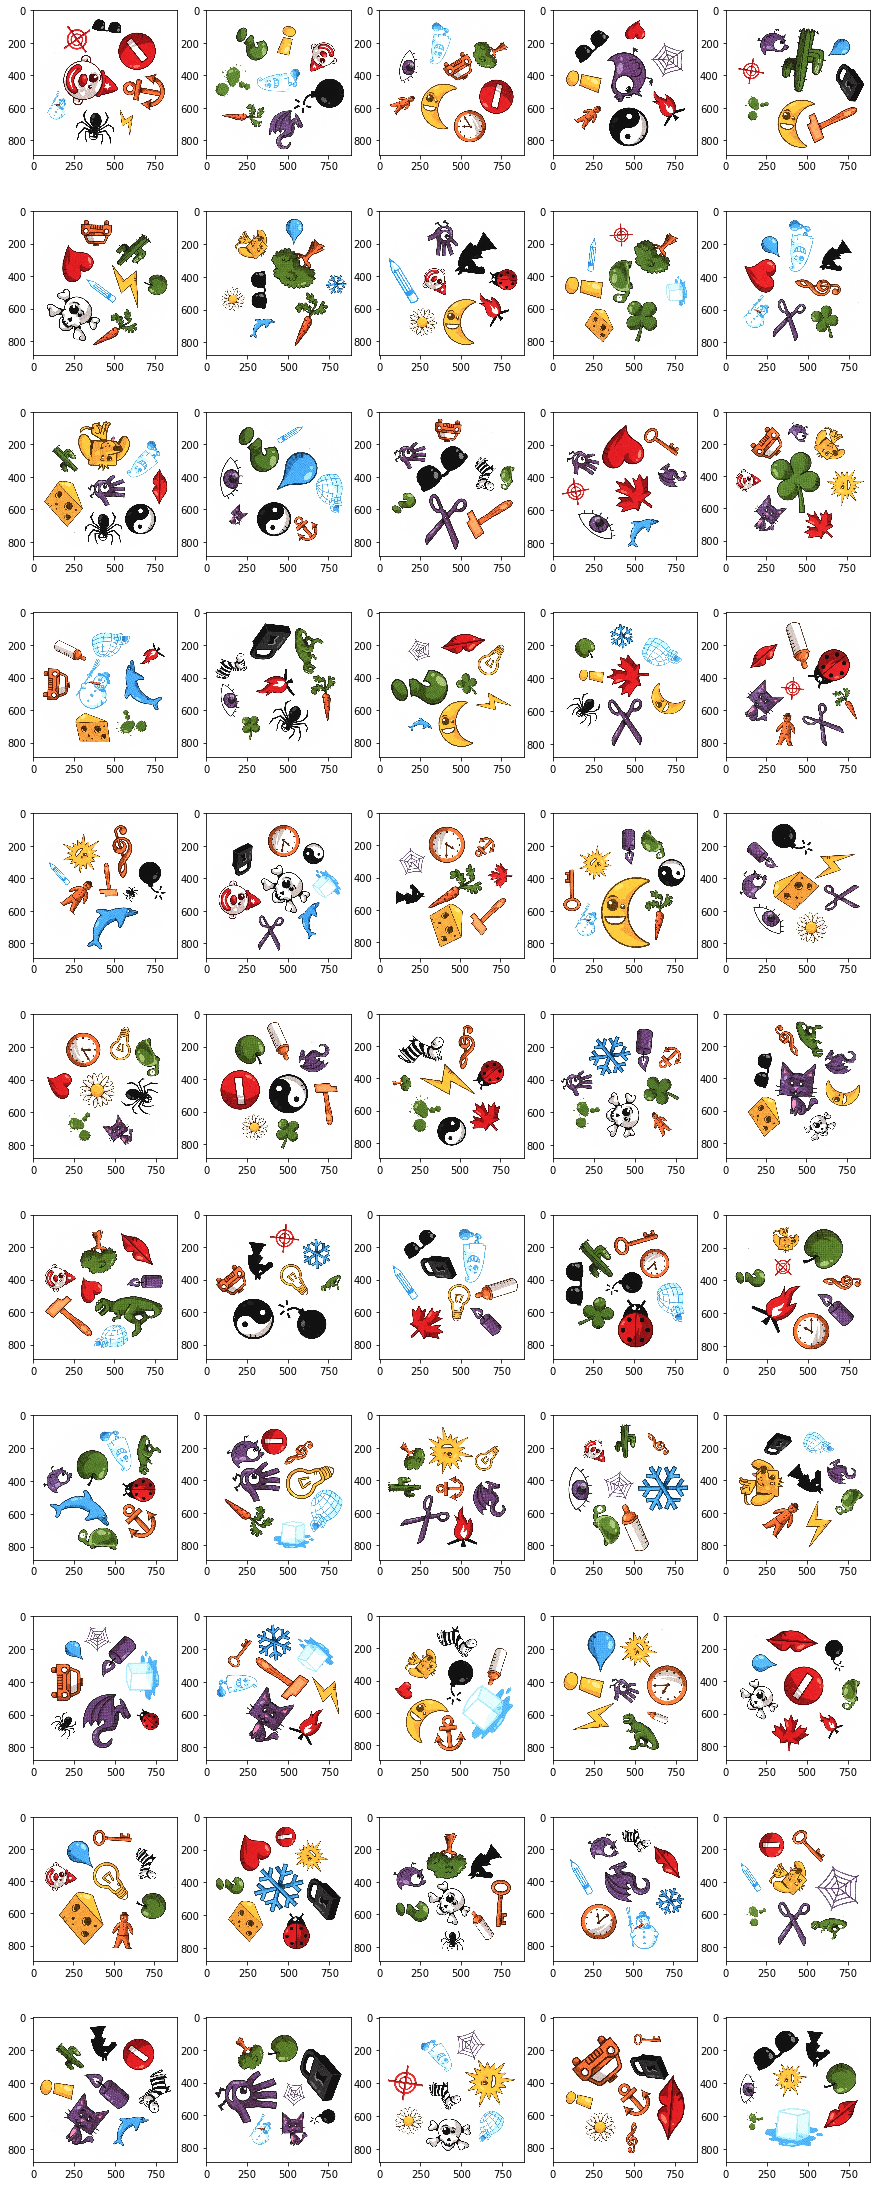

In [69]:
#print all images
fig=plt.figure(figsize=(15, 40))
for i, img in enumerate(cards):
    fig.add_subplot(11, 5, i+1)
    plt.imshow(img)
plt.show()

# Test on one card

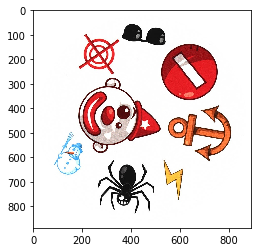

In [35]:
test_card = cards[0]
plt.imshow(test_card)

In [36]:
from skimage.filters import threshold_otsu

test_card = test_card.mean(2)

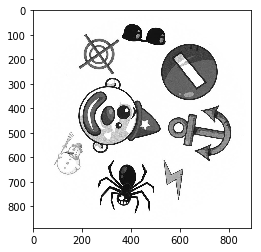

In [37]:
plt.imshow(test_card, cmap='gray')

In [38]:
test_card[test_card < 240] = 0

In [39]:
test_card = test_card == False

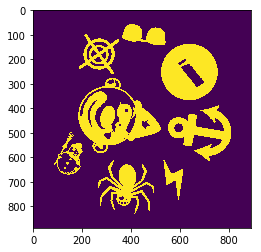

In [40]:
plt.imshow(test_card)

In [49]:
from skimage import morphology 
res = morphology.remove_small_holes(test_card, 40000)

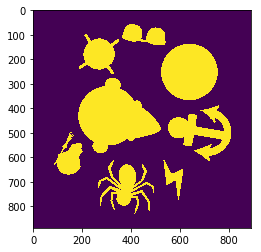

In [50]:
plt.imshow(res)

In [51]:
from skimage.measure import label

In [52]:
labels = label(res)

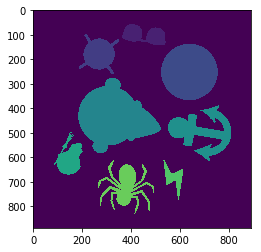

In [54]:
plt.imshow(labels)

# Test on all images

In [72]:
def get_symbols(img):
    img = img.mean(2)
    img[img < 240] = 0
    img = img == False
    res = morphology.remove_small_holes(img, 40000)
    res = morphology.remove_small_objects(res, 50)
    labels = label(res)
    return labels
    

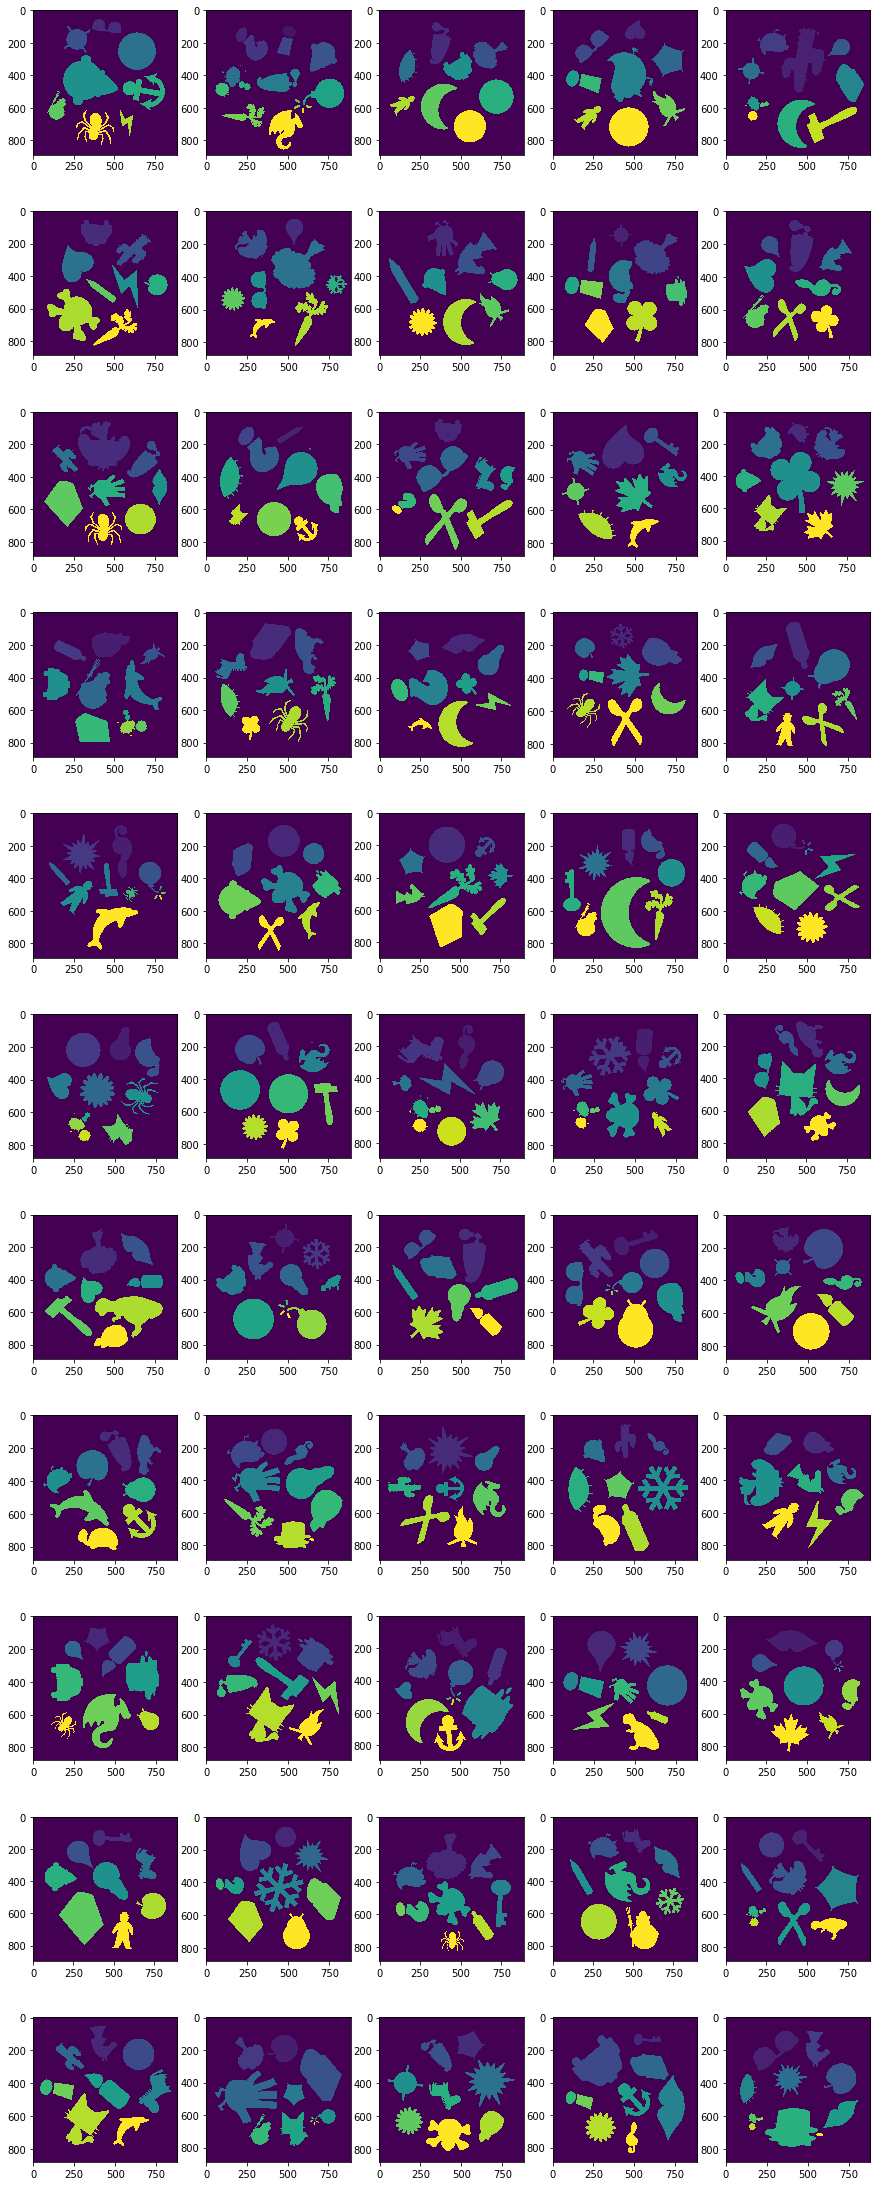

In [73]:
fig=plt.figure(figsize=(15, 40))
for i, card in enumerate(cards):
    symbols = get_symbols(card)
    fig.add_subplot(11, 5, i+1)
    plt.imshow(symbols)
plt.show()
